In [77]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

dat = pd.read_csv('website_link.csv')
dat = dat.drop(columns = ['Unnamed: 0'])
print(len(dat))

48674


In [78]:
# Getting the unique id for each of the url
alist = []
unique_id = []
for i in range(len(dat['links'])):
    url = dat['links'][i].replace(" ", "")
    if str(url) not in alist:
        alist.append(str(url))
        unique_id.append(len(alist)-1)
    else:
        val = alist.index(str(url))
        unique_id.append(val)
        
#print(len(alist))    #28295
#print(len(unique_id))   #48674
df_id = pd.DataFrame({'id': unique_id})
df = pd.concat([dat, df_id], axis= 1)
df.tail(10)

,links,product,id
48664,http://www.amazon.co.uk/Star-Wars-Costume-Sto...,"Star Wars Costume, Kids Stormtrooper Costume S...",28287
48665,http://www.amazon.co.uk/Rubies-Costume-Star-W...,"Star Wars Costume, Kids Stormtrooper Costume S...",28288
48666,http://www.amazon.co.uk/STAR-WARS-Stormtrooper,"Star Wars Costume, Kids Stormtrooper Costume S...",28289
48667,http://www.amazon.co.uk/Deluxe-Stormtrooper,"Star Wars Costume, Kids Stormtrooper Costume S...",10801
48668,http://www.amazon.co.uk/Bandai-Star-Wars-Fight...,Star Wars 1/72 Y-Wing Starfighter,28290
48669,http://www.amazon.co.uk/Bandai-Star-Wars-Star...,Star Wars 1/72 Y-Wing Starfighter,28291
48670,http://www.amazon.co.uk/Star-Wars-48-Snow-Spe...,Star Wars 1/72 Y-Wing Starfighter,28292
48671,http://www.amazon.co.uk/Bandai-Advanced-Starf...,Star Wars 1/72 Y-Wing Starfighter,28293
48672,http://www.amazon.co.uk/Star-Wars-fighter-res...,Star Wars 1/72 Y-Wing Starfighter,28294
48673,http://www.amazon.co.uk/Millennium,Star Wars 1/72 Y-Wing Starfighter,3455


In [79]:
df['id'] = df['id'].apply(str)

In [80]:
# Same product concat it into one record, required format for apriori
new_df = df[['product', 'id']].groupby(['product']).transform(lambda x: ','.join(x))
new_df['product'] = df['product']

In [81]:
# Drop all the rows with duplicate values
new_df.drop_duplicates(subset='id', inplace=True)
new_df.reset_index(drop=True, inplace=True)
print(len(new_df))

8711


In [82]:
new_df.rename(columns={'id': "linked_prod_list"}, inplace=True)
new_df.head(10)

,linked_prod_list,product
0,"0,1,2,3,4,5",Hornby 2014 Catalogue
1,"6,7,8,9,10,11",FunkyBuys® Large Christmas Holiday Express Fes...
2,"12,13,14,15,16,17",CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...
3,"18,19,20,21,22,23",Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...
4,"24,25,26,27,28",20pcs Model Garden Light Double Heads Lamppost...
5,"29,30",Hornby 00 Gauge 230mm BR Bogie Passenger Brake...
6,"31,20,23,32,33,34",Hornby Santa's Express Train Set
7,"35,4,36,37,38,39",Hornby Gauge Western Express Digital Train Set...
8,"40,41,40,42",Learning Curve Chuggington Interactive Chatsworth
9,"43,20,44,45,46,47",Hornby Gauge Railroad Mosley Tarmacadam Locomo...


In [83]:
# Rearrange the format into list
for t in range(len(new_df)):
    result = new_df['linked_prod_list'][t].split(",")
    new_df['linked_prod_list'][t] = result

new_df['linked_prod_list']

0                               [0, 1, 2, 3, 4, 5]
1                             [6, 7, 8, 9, 10, 11]
2                         [12, 13, 14, 15, 16, 17]
3                         [18, 19, 20, 21, 22, 23]
4                             [24, 25, 26, 27, 28]
5                                         [29, 30]
6                         [31, 20, 23, 32, 33, 34]
7                          [35, 4, 36, 37, 38, 39]
8                                 [40, 41, 40, 42]
9                         [43, 20, 44, 45, 46, 47]
10                        [48, 49, 50, 51, 52, 53]
11                        [54, 55, 56, 57, 58, 59]
12                        [60, 61, 62, 63, 64, 65]
13                        [41, 41, 41, 66, 41, 41]
14                                [67, 68, 69, 70]
15                        [71, 72, 73, 74, 75, 76]
16                                        [77, 78]
17                                        [79, 80]
18                        [81, 82, 83, 84, 85, 30]
19                        [86, 

In [84]:
new_df.head(10)

,linked_prod_list,product
0,"[0, 1, 2, 3, 4, 5]",Hornby 2014 Catalogue
1,"[6, 7, 8, 9, 10, 11]",FunkyBuys® Large Christmas Holiday Express Fes...
2,"[12, 13, 14, 15, 16, 17]",CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...
3,"[18, 19, 20, 21, 22, 23]",Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...
4,"[24, 25, 26, 27, 28]",20pcs Model Garden Light Double Heads Lamppost...
5,"[29, 30]",Hornby 00 Gauge 230mm BR Bogie Passenger Brake...
6,"[31, 20, 23, 32, 33, 34]",Hornby Santa's Express Train Set
7,"[35, 4, 36, 37, 38, 39]",Hornby Gauge Western Express Digital Train Set...
8,"[40, 41, 40, 42]",Learning Curve Chuggington Interactive Chatsworth
9,"[43, 20, 44, 45, 46, 47]",Hornby Gauge Railroad Mosley Tarmacadam Locomo...


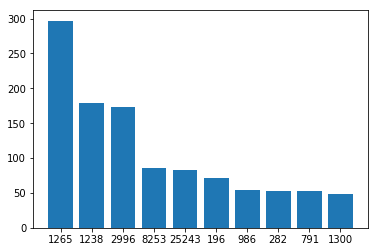

In [85]:
# Evaluate the frequency of each item (affects support)
import collections
import operator
import matplotlib.pyplot as plt
content_list = [item for sublist in new_df['linked_prod_list'] for item in sublist]
counts_all = collections.Counter(content_list)
words, count_values = zip(*counts_all.items())
values_sorted, words_sorted = zip(*sorted(zip(count_values, words), key=operator.itemgetter(0), reverse=True))
words_sorted_top = words_sorted[0:10]
values_sorted_top = values_sorted[0:10]
plt.bar(words_sorted_top,values_sorted_top,align='center') # A bar chart
plt.show()

In [86]:
# Pass the url represented by unique IDs into the apriori algorithm
# Encode the data into a sparse dataframe
te = TransactionEncoder()
te_array = te.fit(new_df['linked_prod_list']).transform(new_df['linked_prod_list'], sparse=True)
convert = pd.SparseDataFrame(te_array, columns=te.columns_, default_fill_value=False)
convert

# Apriori algorithm to obtain the frequent itemset
freq_itemsets = apriori(convert, min_support=0.001, use_colnames= True)
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x: len(x))
freq_itemsets

,support,itemsets,length
0,0.001148,(103),1
1,0.004362,(1038),1
2,0.002181,(1040),1
3,0.001378,(1044),1
4,0.001263,(10668),1
5,0.001033,(11087),1
6,0.001033,(1125),1
7,0.001263,(11266),1
8,0.001722,(11314),1
9,0.001148,(11336),1


In [87]:
# Obtain the rules that fulfills the min confidence
rules = association_rules(fr_itemsets, metric="confidence", min_threshold = 0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1301),(1300),0.002870,0.005625,0.002411,0.840000,149.331429,0.002395,6.214843
1,(1302),(1300),0.001378,0.005625,0.001378,1.000000,177.775510,0.001370,inf
2,(1303),(1300),0.003559,0.005625,0.003214,0.903226,160.571429,0.003194,10.275208
3,(1304),(1300),0.004133,0.005625,0.003788,0.916667,162.960884,0.003765,11.932499
4,(1302),(1303),0.001378,0.003559,0.001148,0.833333,234.166667,0.001143,5.978648
5,(1302),(1304),0.001378,0.004133,0.001263,0.916667,221.807870,0.001257,11.950408
6,(1303),(1304),0.003559,0.004133,0.002870,0.806452,195.138889,0.002855,5.145314
7,(1507),(1353),0.001263,0.002181,0.001148,0.909091,416.794258,0.001145,10.976007
8,(14564),(14507),0.001263,0.001607,0.001033,0.818182,509.084416,0.001031,5.491161
9,(14522),(14517),0.001148,0.001607,0.001033,0.900000,559.992857,0.001031,9.983928


In [88]:
# Get the important information into a dataframe for further processing
rules_ant = pd.DataFrame({'antecedents': rules['antecedents']})
rules_con = pd.DataFrame({'consequents': rules['consequents']})
rules_support = pd.DataFrame({'support': rules['support']})
rules_conf = pd.DataFrame({'confidence': rules['confidence']})
df_rules = pd.concat([rules_ant, rules_con,rules_support, rules_conf], axis= 1)
df_rules.head(10)

,antecedents,consequents,support,confidence
0,(1301),(1300),0.002411,0.840000
1,(1302),(1300),0.001378,1.000000
2,(1303),(1300),0.003214,0.903226
3,(1304),(1300),0.003788,0.916667
4,(1302),(1303),0.001148,0.833333
5,(1302),(1304),0.001263,0.916667
6,(1303),(1304),0.002870,0.806452
7,(1507),(1353),0.001148,0.909091
8,(14564),(14507),0.001033,0.818182
9,(14522),(14517),0.001033,0.900000


In [89]:
# To get the list of unique ids in the rules
new_list = []
for i in df_rules['antecedents'].unique():
    x = i
    string = ""
    for t in x:
        if len(string) < 4:
            string += t
    if string not in new_list:
        new_list.append(string)
        
for j in df_rules['consequents'].unique():
    x = j
    string = ""
    for t in x:
        if len(string) < 4:
            string += t
    if string not in new_list:
        new_list.append(string)

print(new_list)

['1301', '1302', '1303', '1304', '1507', '14564', '14522', '14594', '1489', '1491', '16896', '1865', '43', '25267', '25614', '3782', '3783', '6062', '6083', '6094', '1300', '1353', '14507', '14517', '1492', '16895', '1864', '20', '25250', '25615', '6063']


In [90]:
# Based on the unique ids, get the associated urls 
url_list = []
for i in new_list:
    val = int(i)
    url_list.append(alist[val])
# print(url_list)

In [91]:
# Requests for the product name through web scraping
import requests
import urllib.request
from bs4 import BeautifulSoup
import time

def get_product(url):
    time.sleep(2)   # to avoid being recognize as spam
    with requests.Session() as res:
        headers = {"User-Agent": 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36'}
        response = res.get(url, timeout=5, headers = headers) #proxies={"http": current_proxy, "https": current_proxy})
    soup = BeautifulSoup(response.text, "html.parser")
    if response.status_code == requests.codes.ok:
        result = soup.find('title')
        return result
    else:
        if response.status_code == '503':
            return

def proc_result(result):
    if result == None:
        return 
    else:
        string = ''
        removed = result.text.strip()
        name = removed.split(":")
        string += name[0]
        if name[1] == ' Amazon.co.uk':
            return name[0]
        else:
            string += name[1]
            return string
        
prod = []
for i in range(len(url_list)):
    result = get_product(url_list[i])
    if result == 'Robot Check':
        print("Robot Check error")
        
    else:
        prod_name = proc_result(result)
        print(prod_name)
        prod.append(prod_name)

# print(prod)

None
Dungeons & Dragons Starter Box (D&d Boxed Game)
Monster Manual A Dungeons & Dragons Core Rulebook
Dungeon Master's Guide (Dungeons & Dragons Core Rulebooks)
None
Melissa & Doug Pirate Puppet with Detachable Wooden Rod (Puppets & Puppet Theaters, Animated Gestures, Inspires Creativity, 38.1 cm H x 12.7 cm W x 16.51 cm L)
None
Melissa & Doug Royal Princess Puppet With Detachable Wooden Rod for Animated Gestures
Rory Story Cubes Animalia Dice Mix
Asmodee Rory Story Cubes Fright Dice Mix
Starting Chess
Motion Sand Beach Bucket Playset
Hornby R8223 00 Gauge Track Extension Pack C Hornby
None
Jake and The Never Land Pirates Deluxe Adventure Figure Pack
Schleich Dragon Knight with Sword
Schleich Griffin Knight with Sword
None
Pack Of 36 Mixed Girls Glitter Tattoo Stencils - 36 Unique Designs In Each Pack
Pack Of 24 Boys Junior Glitter Tattoo Stencils - 12 Unique Designs In Each Pack
Dungeons & Dragons Player's Handbook (Dungeons & Dragons Core Rulebooks)
None
Melissa & Doug Deluxe Puppet

In [92]:
# Get the item in frozenset into a list
df_rules['ant_list'] = np.nan
df_rules['cons_list'] = np.nan
for k in range(len(df_rules['antecedents'])):
    x = df_rules['antecedents'][k]
    string = ""
    temp = []
    for t in x:
        if len(string) < 4:
            string += t
        else:
            string = ""
            string += t
        
        temp.append(string)
    df_rules['ant_list'][k] = temp
    
for j in range(len(df_rules['consequents'])):
    x = df_rules['consequents'][j]
    string = ""
    temp = []
    for t in x:
        if len(string) < 4:
            string += t
        else:
            string = ""
            string += t
        
        temp.append(string)
    df_rules['cons_list'][j] = temp   
df_rules

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,antecedents,consequents,support,confidence,ant_list,cons_list
0,(1301),(1300),0.002411,0.840000,[1301],[1300]
1,(1302),(1300),0.001378,1.000000,[1302],[1300]
2,(1303),(1300),0.003214,0.903226,[1303],[1300]
3,(1304),(1300),0.003788,0.916667,[1304],[1300]
4,(1302),(1303),0.001148,0.833333,[1302],[1303]
5,(1302),(1304),0.001263,0.916667,[1302],[1304]
6,(1303),(1304),0.002870,0.806452,[1303],[1304]
7,(1507),(1353),0.001148,0.909091,[1507],[1353]
8,(14564),(14507),0.001033,0.818182,[14564],[14507]
9,(14522),(14517),0.001033,0.900000,[14522],[14517]


In [93]:
# Get the product name for each of the unique id
df_rules['ant_prodName'] = np.nan
df_rules['con_prodName'] = np.nan
for t in range(len(df_rules['ant_list'])):
    if len(df_rules['ant_list'][t]) >= 2:
        temp = []
        for j in df_rules['ant_list'][t]: 
            val = new_list.index(str(j))
            prod_name = prod[val]
            if prod_name != None:
                temp.append(prod_name)
            else:
                temp.append(np.nan)
            df_rules['ant_prodName'][t] = temp
    else:
        for j in df_rules['ant_list'][t]: 
            val = new_list.index(str(j))
            prod_name = prod[val]
            if prod_name != None:
                df_rules['ant_prodName'][t] = prod[val]
            else:
                df_rules['ant_prodName'][t] = np.nan

for t in range(len(df_rules['cons_list'])):
    if len(df_rules['cons_list'][t]) >= 2:
        temp = []
        for j in df_rules['cons_list'][t]: 
            val = new_list.index(str(j))
            prod_name = prod[val]
            if prod_name != None:
                temp.append(prod_name)
            else:
                temp.append(np.nan)
            df_rules['con_prodName'][t] = temp
    else:
        for j in df_rules['cons_list'][t]: 
            val = new_list.index(str(j))
            prod_name = prod[val]
            if prod_name != None:
                df_rules['con_prodName'][t] = prod[val]
            else:
                df_rules['con_prodName'][t] = np.nan
            
df_rules

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,antecedents,consequents,support,confidence,ant_list,cons_list,ant_prodName,con_prodName
0,(1301),(1300),0.002411,0.840000,[1301],[1300],NaN,Dungeons & Dragons Player's Handbook (Dungeons...
1,(1302),(1300),0.001378,1.000000,[1302],[1300],Dungeons & Dragons Starter Box (D&d Boxed Game),Dungeons & Dragons Player's Handbook (Dungeons...
2,(1303),(1300),0.003214,0.903226,[1303],[1300],Monster Manual A Dungeons & Dragons Core Rulebook,Dungeons & Dragons Player's Handbook (Dungeons...
3,(1304),(1300),0.003788,0.916667,[1304],[1300],Dungeon Master's Guide (Dungeons & Dragons Cor...,Dungeons & Dragons Player's Handbook (Dungeons...
4,(1302),(1303),0.001148,0.833333,[1302],[1303],Dungeons & Dragons Starter Box (D&d Boxed Game),Monster Manual A Dungeons & Dragons Core Rulebook
5,(1302),(1304),0.001263,0.916667,[1302],[1304],Dungeons & Dragons Starter Box (D&d Boxed Game),Dungeon Master's Guide (Dungeons & Dragons Cor...
6,(1303),(1304),0.002870,0.806452,[1303],[1304],Monster Manual A Dungeons & Dragons Core Rulebook,Dungeon Master's Guide (Dungeons & Dragons Cor...
7,(1507),(1353),0.001148,0.909091,[1507],[1353],NaN,NaN
8,(14564),(14507),0.001033,0.818182,[14564],[14507],Melissa & Doug Pirate Puppet with Detachable W...,Melissa & Doug Deluxe Puppet Theatre (Sturdy N...
9,(14522),(14517),0.001033,0.900000,[14522],[14517],NaN,NaN


In [94]:
# Drop NA products
df_rules = df_rules.dropna(subset=['ant_prodName', 'con_prodName'])
df_rules = df_rules.sort_values(by = ['confidence'], ascending = False)
df_rules

,antecedents,consequents,support,confidence,ant_list,cons_list,ant_prodName,con_prodName
1,(1302),(1300),0.001378,1.000000,[1302],[1300],Dungeons & Dragons Starter Box (D&d Boxed Game),Dungeons & Dragons Player's Handbook (Dungeons...
43,"(1302, 1303, 1300)",(1304),0.001148,1.000000,"[1302, 1303, 1300]",[1304],[Dungeons & Dragons Starter Box (D&d Boxed Gam...,Dungeon Master's Guide (Dungeons & Dragons Cor...
36,"(1302, 1303)",(1304),0.001148,1.000000,"[1302, 1303]",[1304],[Dungeons & Dragons Starter Box (D&d Boxed Gam...,Dungeon Master's Guide (Dungeons & Dragons Cor...
30,"(1302, 1304)",(1300),0.001263,1.000000,"[1302, 1304]",[1300],[Dungeons & Dragons Starter Box (D&d Boxed Gam...,Dungeons & Dragons Player's Handbook (Dungeons...
42,"(1302, 1303, 1304)",(1300),0.001148,1.000000,"[1302, 1303, 1304]",[1300],[Dungeons & Dragons Starter Box (D&d Boxed Gam...,Dungeons & Dragons Player's Handbook (Dungeons...
27,"(1302, 1303)",(1300),0.001148,1.000000,"[1302, 1303]",[1300],[Dungeons & Dragons Starter Box (D&d Boxed Gam...,Dungeons & Dragons Player's Handbook (Dungeons...
25,"(1304, 1301)",(1300),0.002066,1.000000,"[1304, 1301]",[1300],[Dungeon Master's Guide (Dungeons & Dragons Co...,Dungeons & Dragons Player's Handbook (Dungeons...
19,(3782),(3783),0.001148,1.000000,[3782],[3783],Schleich Dragon Knight with Sword,Schleich Griffin Knight with Sword
23,(6094),(6063),0.001148,1.000000,[6094],[6063],Pack Of 24 Boys Junior Glitter Tattoo Stencils...,Girls 10ml Pot Of Glitter Tattoo Glue - Cosmet...
39,"(1304, 1301, 1303)",(1300),0.001492,1.000000,"[1304, 1301, 1303]",[1300],[Dungeon Master's Guide (Dungeons & Dragons Co...,Dungeons & Dragons Player's Handbook (Dungeons...


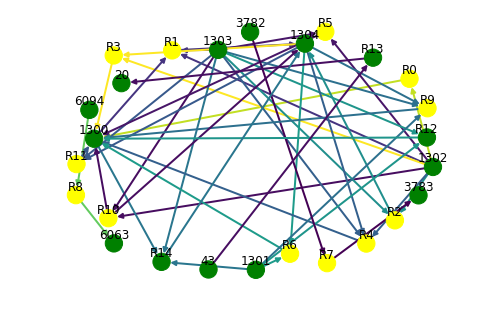

In [95]:
# Visualise the association rules
import networkx as nx
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
    for i in range (rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
    
     
        for a in rules.iloc[i]['antecedents']:
                
            G1.add_nodes_from([a])
        
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
        for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
 
   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

draw_graph(df_rules, 15)